In [1]:
#!pip install pyarrow

In [1]:
import pandas as pd
import pyarrow
from pandas import read_parquet

## 1. tbl_merchants
**Columns**
- merchant_abn
- name
- tags
- revenue_levels
- take_rate

In [2]:
tbl_merchants = pd.read_parquet('../data/tables/tbl_merchants.parquet')

In [3]:
tbl_merchants

,name,tags
merchant_abn,,
10023283211,Felis Limited,"((furniture, home furnishings and equipment sh..."
10142254217,Arcu Ac Orci Corporation,"([cable, satellite, and otHer pay television a..."
10165489824,Nunc Sed Company,"([jewelry, watch, clock, and silverware shops]..."
10187291046,Ultricies Dignissim Lacus Foundation,"([wAtch, clock, and jewelry repair shops], [b]..."
10192359162,Enim Condimentum PC,"([music shops - musical instruments, pianos, a..."
...,...,...
99938978285,Elit Dictum Eu Ltd,"[(opticians, optical goods, and eyeglasses), (..."
99974311662,Mollis LLP,"((books, periodicals, and newspapers), (b), (t..."
99976658299,Sociosqu Corp.,"((shoe shops), (a), (take rate: 6.57))"


In [4]:
tbl_merchants.reset_index().tags[0]

'((furniture, home furnishings and equipment shops, and manufacturers, except appliances), (e), (take rate: 0.18))'

In [5]:
# ETL
# index
tbl_merchants_new = tbl_merchants.reset_index()
# tags
tags_clean = tbl_merchants_new['tags'].str[2:-1].str.replace(')',']').str.replace('(','[').str.replace(']','')
tags_split = tags_clean.str.split('[',expand=True)

tags_final = pd.DataFrame().assign(
    tags = tags_split[0].str.strip().str[:-1],  # delete comma
    revenue_levels = tags_split[1].str.strip().str[:-1],  # delete space and comma
    take_rate = tags_split[2].str.split(':',expand=True)[1].astype(float)
)

# add to dataframe
tbl_merchants_cleaned = tbl_merchants_new.assign(
    tags = tags_final['tags'],  
    revenue_levels = tags_final['revenue_levels'],  
    take_rate = tags_final['take_rate']
)

/var/folders/p0/kb961x5d6wd79gfp2h6t_8500000gn/T/ipykernel_4278/3250096525.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tags_clean = tbl_merchants_new['tags'].str[2:-1].str.replace(')',']').str.replace('(','[').str.replace(']','')


In [6]:
tbl_merchants_cleaned

,merchant_abn,name,tags,revenue_levels,take_rate
0,10023283211,Felis Limited,"furniture, home furnishings and equipment shop...",e,0.18
1,10142254217,Arcu Ac Orci Corporation,"cable, satellite, and otHer pay television and...",b,4.22
2,10165489824,Nunc Sed Company,"jewelry, watch, clock, and silverware shops",b,4.40
3,10187291046,Ultricies Dignissim Lacus Foundation,"wAtch, clock, and jewelry repair shops",b,3.29
4,10192359162,Enim Condimentum PC,"music shops - musical instruments, pianos, and...",a,6.33
...,...,...,...,...,...
4021,99938978285,Elit Dictum Eu Ltd,"opticians, optical goods, and eyeglasses",b,4.50
4022,99974311662,Mollis LLP,"books, periodicals, and newspapers",b,3.17
4023,99976658299,Sociosqu Corp.,shoe shops,a,6.57
4024,99987905597,Commodo Hendrerit LLC,motor vehicle Supplies and new parts,a,6.82


## 2. transaction
**Columns**
- user_id
- merchant_abn
- dollar_value
- order_id
- date

In [7]:
from datetime import datetime 
import datetime as dt
data_started = datetime.strptime('2021-02-28', '%Y-%m-%d') # start date of data
data_ended = datetime.strptime('2021-08-27', '%Y-%m-%d') # end date of data

transaction = pd.DataFrame() # store the data
date_i = datetime.strptime('2021-02-28', '%Y-%m-%d')

while date_i <= data_ended:
    data = pd.read_parquet('../data/tables/transactions_20210228_20210827_snapshot/order_datetime={}'.format(
        date_i.strftime("%Y-%m-%d")))  ## collect the daily transaction data
    
    data['date'] = date_i
    
    transaction = pd.concat([transaction,data],axis = 0)
    if date_i.day == 1:
        print(date_i.strftime("%Y-%m-%d"),'done!')
    date_i += dt.timedelta(days=1)


2021-03-01 done!
2021-04-01 done!
2021-05-01 done!
2021-06-01 done!
2021-07-01 done!
2021-08-01 done!


In [8]:
transaction

,user_id,merchant_abn,dollar_value,order_id,date
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28
...,...,...,...,...,...
23197,18470,29323795999,8.346682,f35299fa-c9f4-408e-bb86-b9d5fff65a9a,2021-08-27
23198,18471,21359184622,97.760164,8ed0f865-9f70-4e20-8266-81904c95de89,2021-08-27
23199,18472,21807339153,54.310599,3251ce95-a850-4fbc-98d0-32bce1651d40,2021-08-27
23200,18475,41944909975,103.804012,bd52416a-a7f1-4293-ae96-cc4a8392e414,2021-08-27


## 3. tbl_consumer
**Columns**
- name
- address
- state
- postcode
- gender
- consumer_id

In [9]:
tbl_consumer = pd.read_csv('../data/tables/tbl_consumer.csv',sep='|')

In [10]:
tbl_consumer

,name,address,state,postcode,gender,consumer_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975
...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005


In [11]:
consumer_user_details = pd.read_parquet('../data/tables/consumer_user_details.parquet')

In [12]:
consumer_user_details

,user_id,consumer_id
0,1,1195503
1,2,179208
2,3,1194530
3,4,154128
4,5,712975
...,...,...
499994,499995,1385608
499995,499996,1466964
499996,499997,1253484
499997,499998,175005


## 4. new_transaction
**Columns**
- user_id
- merchant_abn
- dollar_value
- order_id
- date

In [13]:
from datetime import datetime 
import datetime as dt
data_started = datetime.strptime('2021-08-28', '%Y-%m-%d') # start date of data
data_ended = datetime.strptime('2022-02-27', '%Y-%m-%d') # end date of data

transaction_new = pd.DataFrame() # store the data
date_i = datetime.strptime('2021-08-28', '%Y-%m-%d')

while date_i <= data_ended:
    data = pd.read_parquet('../data/tables/transactions_20210828_20220227_snapshot/order_datetime={}'.format(
        date_i.strftime("%Y-%m-%d")))  ## collect the daily transaction data
    
    data['date'] = date_i
    
    transaction_new = pd.concat([transaction_new,data],axis = 0)
    if date_i.day == 1:
        print(date_i.strftime("%Y-%m-%d"),'done!')
    date_i += dt.timedelta(days=1)


2021-09-01 done!
2021-10-01 done!
2021-11-01 done!
2021-12-01 done!
2022-01-01 done!
2022-02-01 done!


In [14]:
transaction_new

,user_id,merchant_abn,dollar_value,order_id,date
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28
...,...,...,...,...,...
20773,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27
20774,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27
20775,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27
20776,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27


In [15]:
## Description
transaction_new.groupby('user_id').count().sort_values(by = 'order_id',ascending= False) ## 24081 users

,merchant_abn,dollar_value,order_id,date
user_id,,,,
14596,231,231,231,231
22883,229,229,229,229
8302,228,228,228,228
5793,228,228,228,228
19933,227,227,227,227
...,...,...,...,...
20831,148,148,148,148
1212,147,147,147,147
7190,147,147,147,147


## Merge
- **primary key** & *foreign key*
- tbl_merchants_cleaned：***merchant_abn***｜	name	｜tags｜	revenue_levels	take_rate
- transaction_new：*user_id* ｜	*merchant_abn*	｜dollar_value｜	**order_id**	｜date
- tbl_consumer：name	｜address	｜state	｜postcode｜	gender｜	***consumer_id***
- consumer_user_details：***user_id***	｜***consumer_id***

In [16]:
merge_1 = pd.merge(tbl_consumer,consumer_user_details,on='consumer_id',how = 'left')
merge_1

,name,address,state,postcode,gender,consumer_id,user_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,3
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,4
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975,5
...,...,...,...,...,...,...,...
499994,Jessica Avila,508 Miranda Overpass Apt. 218,QLD,4400,Female,1385608,499995
499995,Steven Thornton,7913 Schwartz Mission Suite 483,VIC,3097,Undisclosed,1466964,499996
499996,Christy Smith,5681 Zachary Mountain Apt. 060,NSW,2756,Undisclosed,1253484,499997
499997,Donna Sutton,54140 Jacob Point,VIC,3989,Female,175005,499998


In [17]:
merge_2 = pd.merge(transaction_new, merge_1,on='user_id',how = 'left')
merge_2

,user_id,merchant_abn,dollar_value,order_id,date,name,address,state,postcode,gender,consumer_id
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128
...,...,...,...,...,...,...,...,...,...,...,...
4508101,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508102,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508103,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380
4508104,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27,Allison Carpenter,32526 Moore Throughway Apt. 573,QLD,4105,Undisclosed,694139


In [18]:
merge_3 = pd.merge(merge_2,tbl_merchants_cleaned,on='merchant_abn',how = 'left')
merge_3

,user_id,merchant_abn,dollar_value,order_id,date,name_x,address,state,postcode,gender,consumer_id,name_y,tags,revenue_levels,take_rate
0,1,45629217853,43.738115,809b9b93-0a7d-4627-abd8-b6899d13f169,2021-08-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,Lacus Consulting,"gift, Card, novelty, and souvenir shops",a,6.98
1,14936,24852446429,9.788472,5a04b94c-c553-47c6-b99b-a9697b977984,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886,Erat Vitae LLP,"florists supplies, nursery stock, and floWers",c,2.94
2,3,32656335530,100.160247,8776872a-a340-46ff-84c8-a024453ff8c3,2021-08-28,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,Enim Etiam Gravida PC,"gift, card, novelty, and souveniR shops",b,3.92
3,14936,72472909171,28.540345,e997036a-1418-44c6-8629-6691a2975297,2021-08-28,Maria Riley,416 Phillip View Suite 130,SA,5157,Female,986886,Nullam Consulting,"digiTal goods: books, movies, music",a,6.33
4,4,86223953880,313.021668,6161bda6-030c-42c0-8bd6-9067f18d4223,2021-08-28,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,Libero Et Inc.,"computer programming , data processing, and in...",c,1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508101,14931,94455880010,93.759048,29584323-55f2-4e3c-82b4-6c2f4a8d729e,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Nunc Sit LLC,"computer programming , datA procEssing, and in...",a,6.33
4508102,14931,35755909141,124.307113,300b907e-f902-4f48-a809-7662cb118885,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Tristique Neque Venenatis Associates,"furniture, home furnishings and eqUipment shop...",b,4.16
4508103,14931,79417999332,131.169882,1c44d278-5346-4311-b78c-94b3dc5b6e2c,2022-02-27,Victoria Burton,68380 Krause Ranch Suite 756,QLD,4627,Female,363380,Phasellus At Company,"gift, card, novelty, and souvenIr shops",b,4.95
4508104,14932,46804135891,37.889414,3abc2a93-8be3-461b-9754-40152b0451bf,2022-02-27,Allison Carpenter,32526 Moore Throughway Apt. 573,QLD,4105,Undisclosed,694139,Suspendisse Dui Corporation,"opticians, optical goods, and eyeglasses",c,2.93


In [19]:
# basic infor
merge_3['user_id'] = merge_3['user_id'].astype('str')
merge_3['merchant_abn'] = merge_3['merchant_abn'].astype('str')
merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508106 entries, 0 to 4508105
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         object        
 1   merchant_abn    object        
 2   dollar_value    float64       
 3   order_id        object        
 4   date            datetime64[ns]
 5   name_x          object        
 6   address         object        
 7   state           object        
 8   postcode        int64         
 9   gender          object        
 10  consumer_id     int64         
 11  name_y          object        
 12  tags            object        
 13  revenue_levels  object        
 14  take_rate       float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 550.3+ MB


In [20]:
## continues variable 
merge_3[['dollar_value','take_rate']].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
dollar_value,4508106.0,166.40,520.15,0.0,26.12,62.29,150.42,77320.87
take_rate,4323692.0,4.59,1.74,0.1,3.05,4.78,6.16,7.00


- **serious scatter of the dollar value.**

<AxesSubplot:>

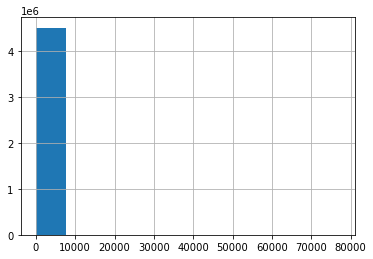

In [21]:
# distribution 
merge_3['dollar_value'].hist()

<AxesSubplot:>

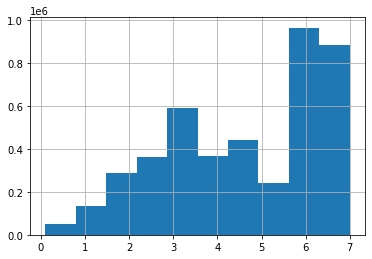

In [22]:
# distribution
merge_3['take_rate'].hist()

In [23]:
merge_3['dollar_value'].sort_values()

2090955        0.000007
3251609        0.000025
825805         0.000026
760959         0.000077
1758798        0.000102
               ...     
4355696    50209.505439
1203109    51876.637564
1153407    56552.394443
2788865    67706.740191
3094726    77320.869803
Name: dollar_value, Length: 4508106, dtype: float64

In [24]:
merge_3['take_rate'].unique()

array([6.98, 2.94, 3.92, 6.33, 1.84, 2.42, 6.18, 3.59, 1.57, 4.64, 5.8 ,
       6.61, 4.87, 6.1 , 3.81, 2.68,  nan, 4.7 , 4.41, 2.86, 1.88, 5.05,
       4.31, 4.69, 3.17, 4.46, 6.31, 6.13, 3.5 , 5.97, 5.1 , 4.16, 6.55,
       2.72, 6.77, 1.47, 3.43, 5.52, 3.88, 6.15, 4.93, 6.48, 3.15, 6.7 ,
       3.41, 6.37, 5.56, 6.09, 2.04, 1.52, 5.65, 3.71, 3.49, 6.  , 4.77,
       5.93, 5.71, 6.74, 6.42, 3.05, 6.22, 6.81, 6.43, 6.86, 4.91, 4.95,
       5.53, 6.78, 4.47, 3.3 , 6.35, 5.07, 2.48, 5.68, 5.72, 4.8 , 4.07,
       2.73, 6.01, 5.51, 6.41, 1.94, 2.62, 5.94, 6.39, 6.26, 5.64, 6.38,
       4.81, 0.56, 6.58, 5.76, 2.93, 0.22, 1.04, 3.44, 3.74, 6.99, 5.09,
       6.59, 6.64, 5.77, 1.89, 1.91, 5.99, 6.16, 2.88, 3.72, 2.69, 3.83,
       3.84, 6.72, 6.34, 2.5 , 5.88, 4.08, 1.86, 4.45, 2.03, 5.98, 2.91,
       5.66, 3.36, 6.9 , 4.02, 0.38, 1.78, 3.27, 3.24, 5.9 , 5.95, 3.68,
       5.82, 3.04, 6.24, 6.54, 5.89, 6.69, 3.76, 1.44, 6.6 , 5.03, 6.57,
       3.91, 3.85, 2.06, 6.02, 0.24, 1.13, 4.52, 4.

In [25]:
# lack data information
merge_3.isnull().sum()

user_id                0
merchant_abn           0
dollar_value           0
order_id               0
date                   0
name_x                 0
address                0
state                  0
postcode               0
gender                 0
consumer_id            0
name_y            184414
tags              184414
revenue_levels    184414
take_rate         184414
dtype: int64

In [26]:
# missing rate
missing_rate = round(184414/4508106,4)
missing_rate

0.0409

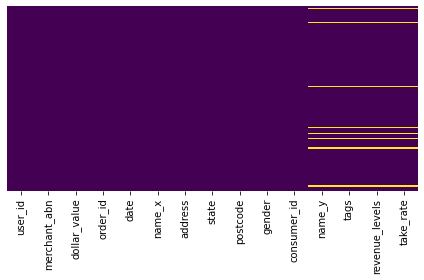

In [27]:
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(merge_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# when data is null, the color is yellow 
plt.tight_layout() 
plt.show()

<AxesSubplot:>

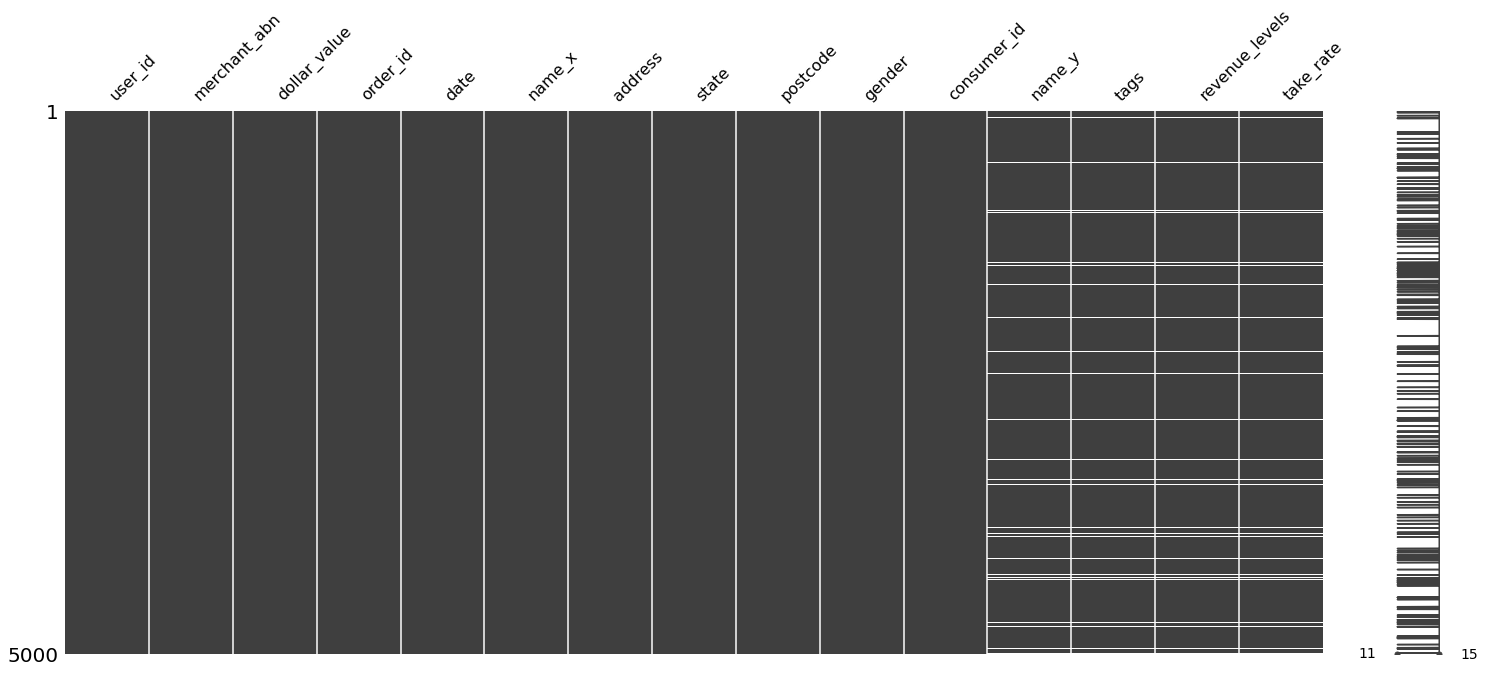

In [28]:
# !pip install missingno
import missingno as msno

msno.matrix  
msno.matrix(merge_3.sample(5000))

- - It can be seen from the data that merchant_name, tags, revenue_levels and take_rate are the most missing. These are the attributes of the commodity table (tbl_merchants). Therefore, the commodity table is not complete, resulting in a mismatch or an error in the id. We need to check it.

In [30]:
# see outliers
merge_3[merge_3.name_y.isnull()]

,user_id,merchant_abn,dollar_value,order_id,date,name_x,address,state,postcode,gender,consumer_id,name_y,tags,revenue_levels,take_rate
16,14,43820812476,163.617003,62175fef-d6f5-4bcc-a17b-31c617ca40f3,2021-08-28,Lance Butler,8943 Kenneth Camp,VIC,3332,Male,1343547,NaN,NaN,NaN,NaN
27,14949,32234779638,78.340662,9f717f37-da06-4f47-abbf-cad670b3518f,2021-08-28,Charles Mendoza,7257 Deborah Pike Suite 753,VIC,3533,Male,816111,NaN,NaN,NaN,NaN
42,34,29323795999,23.351839,5aadaf04-9f0f-4d4d-96a5-e14dc131871a,2021-08-28,Dakota Kelley,328 Manning Summit Apt. 216,NSW,2823,Male,773039,NaN,NaN,NaN,NaN
107,15000,53997373109,327.125541,578c3c42-21b2-4225-ab1c-cf78ae7bc188,2021-08-28,Jose Adams,7154 Wright Hollow,VIC,3102,Male,691041,NaN,NaN,NaN,NaN
141,15021,57959696529,2008.250733,33498d8b-09ce-4b54-bdc5-25be3977f4b2,2021-08-28,Cynthia Cervantes,72523 Miller Radial Apt. 738,NSW,2029,Female,665368,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508000,14810,95492562735,214.227392,fb7bae0c-46d1-431a-827f-efff9d37c583,2022-02-27,Dr. Amanda James DVM,37690 Walker Flats,WA,6961,Female,671807,NaN,NaN,NaN,NaN
4508066,14880,67330176930,101.096921,236bfc74-e3ed-4548-924c-cc48154cf80c,2022-02-27,John Fisher,33409 Jones Meadows,VIC,3062,Male,781402,NaN,NaN,NaN,NaN
4508071,14888,91848160033,42.700690,c63c4ea9-7b61-495b-b5b5-a2e81ab47dc4,2022-02-27,Terri Little,2376 Gina Lights Suite 896,VIC,3052,Female,590354,NaN,NaN,NaN,NaN
4508084,14902,32234779638,87.401381,d477c76a-6997-4022-8d34-da9becd9beb2,2022-02-27,Julie Rowe,95947 Flores Run,NSW,1036,Undisclosed,1346423,NaN,NaN,NaN,NaN


In [31]:
merge_3[merge_3.name_y.isnull()]['merchant_abn'].unique().shape # lack 

(381,)

In [32]:
merge_3['state'].value_counts()

NSW    1301083
VIC    1040906
WA      713271
QLD     667956
SA      512386
TAS     167178
NT       64224
ACT      41102
Name: state, dtype: int64

<BarContainer object of 8 artists>

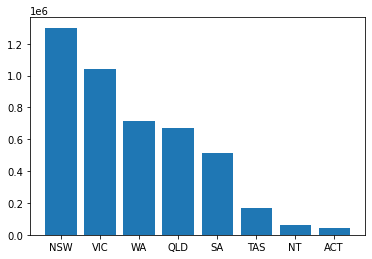

In [33]:
plt.bar(merge_3['state'].value_counts().index,merge_3['state'].value_counts().values)

In [34]:
merge_3['dollar_value'].value_counts() ## most are 157 

157.000000    12723
43.738115         1
16.101388         1
153.134522        1
53.212105         1
              ...  
6.331250          1
3.409148          1
50.486093         1
155.170182        1
196.988323        1
Name: dollar_value, Length: 4495384, dtype: int64

In [35]:
## delete null
import numpy as np
clean = merge_3.copy()
dollar_data = clean.dollar_value
q1 = np.percentile(dollar_data,25)
q3 = np.percentile(dollar_data,75)
iqr = q3-q1
clean= clean[(clean.dollar_value >= q1-iqr) & (clean.dollar_value <= q3+iqr)]

<AxesSubplot:>

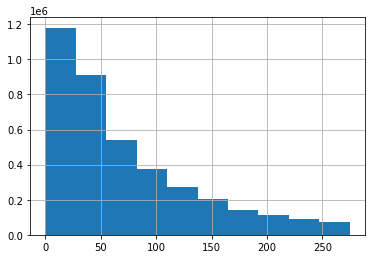

In [36]:
clean['dollar_value'].hist() 

<AxesSubplot:>

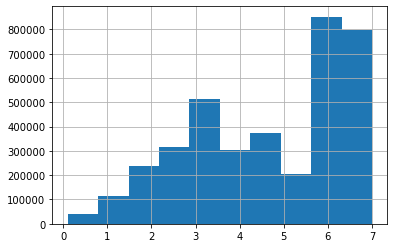

In [37]:
clean['take_rate'].hist()

In [38]:
take_rate_data = clean.take_rate.dropna()
q1 = np.percentile(take_rate_data,25)
q3 = np.percentile(take_rate_data,75)
iqr = q3-q1
clean = clean[(clean.take_rate >= q1-iqr) & (clean.take_rate <= q3+iqr)]

<AxesSubplot:>

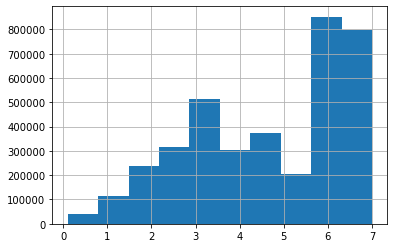

In [39]:
clean['take_rate'].hist()

In [40]:
clean = clean.dropna().drop_duplicates()

## external data set 

In [29]:
link_tb = pd.read_excel('../data/tables/australian_postcodes.xls') ## postcode to SA2 code
link_tb = (link_tb[['Postcode','SA2 MAINCODE 2016','SA2 NAME 2016']].
           rename({'Postcode':'postcode','SA2 MAINCODE 2016':'SA2 code'},axis = 1).drop_duplicates())

In [30]:
link_tb = link_tb.loc[link_tb['postcode'].drop_duplicates().index,:]
link_tb

,postcode,SA2 code,SA2 NAME 2016
0,200,801051049.0,Acton
2,800,701011002.0,Darwin City
4,801,701011002.0,Darwin City
5,804,701011007.0,Parap
6,810,701021010.0,Alawa
...,...,...,...
18437,9013,305011105.0,Brisbane City
18438,9015,305011105.0,Brisbane City
18439,9464,302031038.0,Northgate - Virginia
18440,9726,309101268.0,Bundall


In [31]:
population = pd.read_excel('../data/tables/ABS_population_2021.xlsx') 

In [32]:
population.head()

,S/T code,S/T name,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,2021,2011-2021\t,2011-2021%,Area,Population density 2021
0,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,4330,872,25.2,3418.4,1.3
1,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,8546,-546,-6.0,7.0,1223.9
2,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,11370,655,6.1,4.8,2387.7
3,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,5093,142,2.9,13.0,391.7
4,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,12743,-480,-3.6,13.7,931.9


In [126]:
income = pd.read_excel('../data/tables/ABS_income_2021.xls').rename({'SA2':'SA2 code'},axis = 1)

In [34]:
income.head()

,SA2 code,SA2 NAME,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18
0,Australia,NaN,14069082,42,903888674402,49805,64246
1,New South Wales,NaN,4466941,42,300176988652,50153,67200
2,101021007,Braidwood,2315,51,119439615,42003,51594
3,101021008,Karabar,5059,42,322715297,59295,63790
4,101021009,Queanbeyan,6595,39,414579067,57848,62863


In [37]:
merge_4 = pd.merge(clean,link_tb,on='postcode',how = 'left')
merge_5 = pd.merge(merge_4,population,on='SA2 code',how = 'left')
merge_6 = pd.merge(merge_5,income,on='SA2 code',how = 'left')

In [ ]:
merge_6.info()

## all table

In [56]:
consumer_fraud = pd.read_csv('../data/tables/consumer_fraud_probability.csv') 
merchant_fraud = pd.read_csv('../data/tables/merchant_fraud_probability.csv') 
consumer_fraud['order_datetime'] = pd.to_datetime(consumer_fraud['order_datetime'])
merchant_fraud['order_datetime'] = pd.to_datetime(merchant_fraud['order_datetime'])
consumer_fraud['user_id'] = consumer_fraud['user_id'].astype('str')
merchant_fraud['merchant_abn'] = merchant_fraud['merchant_abn'].astype('str')

In [39]:
consumer_fraud

,user_id,order_datetime,fraud_probability
0,6228,2021-12-19,97.629808
1,21419,2021-12-10,99.247380
2,5606,2021-10-17,84.058250
3,3101,2021-04-17,91.421921
4,22239,2021-10-19,94.703425
...,...,...,...
34859,18466,2022-02-22,8.679873
34860,17552,2021-12-26,8.349463
34861,17875,2021-06-27,8.288847
34862,10401,2021-09-18,8.842216


In [40]:
merchant_fraud

,merchant_abn,order_datetime,fraud_probability
0,19492220327,2021-11-28,44.403659
1,31334588839,2021-10-02,42.755301
2,19492220327,2021-12-22,38.867790
3,82999039227,2021-12-19,94.134700
4,90918180829,2021-09-02,43.325517
...,...,...,...
109,80089686333,2021-09-01,67.505811
110,83220249221,2021-11-27,63.512459
111,85482742429,2021-11-27,70.881311
112,11470993597,2021-09-28,63.377344


In [41]:
from datetime import datetime 
import datetime as dt
data_started = datetime.strptime('2022-02-28', '%Y-%m-%d') # start date of data
data_ended = datetime.strptime('2022-08-28', '%Y-%m-%d') # end date of data

transaction_3 = pd.DataFrame() # store the data
date_i = datetime.strptime('2022-02-28', '%Y-%m-%d')

while date_i <= data_ended:
    data = pd.read_parquet('../data/tables/transactions_20220228_20220828_snapshot/order_datetime={}'.format(
        date_i.strftime("%Y-%m-%d")))  ## collect the daily transaction data
    
    data['date'] = date_i
    
    transaction_3 = pd.concat([transaction_3,data],axis = 0)
    if date_i.day == 1:
        print(date_i.strftime("%Y-%m-%d"),'done!')
    date_i += dt.timedelta(days=1)


2022-03-01 done!
2022-04-01 done!
2022-05-01 done!
2022-06-01 done!
2022-07-01 done!
2022-08-01 done!


In [42]:
transaction_3

,user_id,merchant_abn,dollar_value,order_id,date
0,1,96152467973,24.045785,fbd6ce4d-47ac-435c-bf42-bf696ec0961b,2022-02-28
1,22284,29362189014,68.955569,a0b0d044-92b1-48ba-84c6-1431e56281b5,2022-02-28
2,2,91923722701,5.848609,229dea28-df16-44f0-adc5-47988fd5c771,2022-02-28
3,22284,82065156333,9.788732,54da70f5-5cdd-473f-8525-f01208690500,2022-02-28
4,3,32234779638,47.257325,7bf22678-acd4-426e-b46b-ec3b1abd6376,2022-02-28
...,...,...,...,...,...
27025,24077,98973094975,294.470701,55b1732b-bd25-4407-8f7f-db4348a79751,2022-08-28
27026,24077,80779820715,56.650642,07615f84-d17b-4799-8dcd-076887484f03,2022-08-28
27027,24080,89640578182,21.837852,5658f5c2-caef-44c0-a350-9a487754d0b3,2022-08-28
27028,24081,63290521567,19.628920,5eaf75f6-f1ca-499b-98e6-18ee3a358cc3,2022-08-28


- **transaction**
- **transaction_new**
- **transaction_3**

In [43]:
transaction_all = pd.concat([transaction,transaction_new,transaction_3],axis = 0)

In [44]:
transaction_all

,user_id,merchant_abn,dollar_value,order_id,date
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28
...,...,...,...,...,...
27025,24077,98973094975,294.470701,55b1732b-bd25-4407-8f7f-db4348a79751,2022-08-28
27026,24077,80779820715,56.650642,07615f84-d17b-4799-8dcd-076887484f03,2022-08-28
27027,24080,89640578182,21.837852,5658f5c2-caef-44c0-a350-9a487754d0b3,2022-08-28
27028,24081,63290521567,19.628920,5eaf75f6-f1ca-499b-98e6-18ee3a358cc3,2022-08-28


In [45]:
merge_2_all = pd.merge(transaction_all, merge_1,on='user_id',how = 'left')
merge_2_all

,user_id,merchant_abn,dollar_value,order_id,date,name,address,state,postcode,gender,consumer_id
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Samuel Haynes,9969 Catherine View Apt. 601,VIC,3073,Male,1212819
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Aaron Sawyer,362 Dixon Islands,WA,6646,Male,1302316
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208
...,...,...,...,...,...,...,...,...,...,...,...
12561372,24077,98973094975,294.470701,55b1732b-bd25-4407-8f7f-db4348a79751,2022-08-28,Maria Lopez,6036 Rosario Mount Apt. 283,QLD,4474,Female,831103
12561373,24077,80779820715,56.650642,07615f84-d17b-4799-8dcd-076887484f03,2022-08-28,Maria Lopez,6036 Rosario Mount Apt. 283,QLD,4474,Female,831103
12561374,24080,89640578182,21.837852,5658f5c2-caef-44c0-a350-9a487754d0b3,2022-08-28,Amy Russo,4525 Frazier Meadows,NSW,2809,Female,940951
12561375,24081,63290521567,19.628920,5eaf75f6-f1ca-499b-98e6-18ee3a358cc3,2022-08-28,Jacqueline Rice,98418 Gary Creek Suite 728,VIC,3980,Female,1177416


In [46]:
merge_3_all = pd.merge(merge_2_all,tbl_merchants_cleaned,on='merchant_abn',how = 'left')
merge_3_all

,user_id,merchant_abn,dollar_value,order_id,date,name_x,address,state,postcode,gender,consumer_id,name_y,tags,revenue_levels,take_rate
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,Sed Nunc Industries,"books, periodicals, anD newspapers",b,4.24
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Samuel Haynes,9969 Catherine View Apt. 601,VIC,3073,Male,1212819,Cursus Non Egestas Foundation,"furniture, home furnishings and equipment shop...",c,2.17
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,Id Erat Etiam Consulting,"gift, card, novelty, and souvenir shops",b,3.15
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Aaron Sawyer,362 Dixon Islands,WA,6646,Male,1302316,Arcu Morbi Institute,artist supply and craft shops,c,1.47
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,Euismod Enim LLC,"watch, clock, and jewelry repair shops",b,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12561372,24077,98973094975,294.470701,55b1732b-bd25-4407-8f7f-db4348a79751,2022-08-28,Maria Lopez,6036 Rosario Mount Apt. 283,QLD,4474,Female,831103,Ornare Fusce Inc.,"hobby, toy and game shops",a,5.98
12561373,24077,80779820715,56.650642,07615f84-d17b-4799-8dcd-076887484f03,2022-08-28,Maria Lopez,6036 Rosario Mount Apt. 283,QLD,4474,Female,831103,Euismod Enim LLC,"watch, clock, and jewelry repair shops",b,4.71
12561374,24080,89640578182,21.837852,5658f5c2-caef-44c0-a350-9a487754d0b3,2022-08-28,Amy Russo,4525 Frazier Meadows,NSW,2809,Female,940951,Magnis Foundation,tent and awning shops,a,6.22
12561375,24081,63290521567,19.628920,5eaf75f6-f1ca-499b-98e6-18ee3a358cc3,2022-08-28,Jacqueline Rice,98418 Gary Creek Suite 728,VIC,3980,Female,1177416,Vehicula Pellentesque Corporation,artist supply and craft shops,a,6.48


In [47]:
merge_3_all['user_id'] = merge_3_all['user_id'].astype('str')
merge_3_all['merchant_abn'] = merge_3_all['merchant_abn'].astype('str')
merge_3_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12561377 entries, 0 to 12561376
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         object        
 1   merchant_abn    object        
 2   dollar_value    float64       
 3   order_id        object        
 4   date            datetime64[ns]
 5   name_x          object        
 6   address         object        
 7   state           object        
 8   postcode        int64         
 9   gender          object        
 10  consumer_id     int64         
 11  name_y          object        
 12  tags            object        
 13  revenue_levels  object        
 14  take_rate       float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 1.5+ GB


In [48]:
## delete 
import numpy as np
clean_all = merge_3_all.copy()
dollar_data = clean_all.dollar_value
q1 = np.percentile(dollar_data,25)
q3 = np.percentile(dollar_data,75)
iqr = q3-q1
clean_all = clean_all[(clean_all.dollar_value >= q1-iqr) & (clean_all.dollar_value <= q3+iqr)]

In [49]:
take_rate_data = clean_all.take_rate.dropna()
q1 = np.percentile(take_rate_data,25)
q3 = np.percentile(take_rate_data,75)
iqr = q3-q1
clean_all = clean_all[(clean_all.take_rate >= q1-iqr) & (clean_all.take_rate <= q3+iqr)]

In [50]:
clean_all = clean_all.dropna().drop_duplicates()

## isfraud table

In [51]:
to_merge = clean_all.copy()
to_merge = to_merge.rename({'date':'order_datetime'},axis = 1)

In [127]:
merge_4 = pd.merge(to_merge,link_tb,on='postcode',how = 'left')
merge_5 = pd.merge(merge_4,population,on='SA2 code',how = 'left')
merge_6 = pd.merge(merge_5,income,on='SA2 code',how = 'left')

In [69]:

merge_6

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name_x,address,state,postcode,gender,...,2011-2021\t,2011-2021%,Area,Population density 2021,SA2 NAME,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,...,1424.0,14.1,11.7,982.8,Midland - Guildford,5683,42,346078382,51632,60897
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Samuel Haynes,9969 Catherine View Apt. 601,VIC,3073,Male,...,-1219.0,-5.7,14.7,1376.3,Thomastown,10049,38,470369836,41612,46808
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,...,1424.0,14.1,11.7,982.8,Midland - Guildford,5683,42,346078382,51632,60897
3,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Mary Smith,3764 Amber Oval,NSW,2782,Female,...,271.0,4.4,21.0,306.0,Wentworth Falls,3562,51,212463362,45052,59647
4,18489,43186523025,98.148785,9008a98e-1b02-4de4-bc4c-47395f6275f6,2021-02-28,Elijah Wong,6111 Allen Walk Suite 233,VIC,3378,Male,...,222.0,7.5,4023.2,0.8,Ararat Region,1878,50,94973125,41086,50571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440632,24076,95896852636,62.756384,3bc4aac4-32e1-4ed2-a8d4-48b4d8b270c9,2022-08-28,Dr. Jason Scott,3749 Sierra Wells Suite 093,VIC,3469,Male,...,151.0,4.5,1714.2,2.0,Avoca,1696,50,74282185,38543,43798
10440633,24077,80779820715,56.650642,07615f84-d17b-4799-8dcd-076887484f03,2022-08-28,Maria Lopez,6036 Rosario Mount Apt. 283,QLD,4474,Female,...,-610.0,-18.1,188751.6,0.0,Far South West,1455,46,68532842,43303,47102
10440634,24080,89640578182,21.837852,5658f5c2-caef-44c0-a350-9a487754d0b3,2022-08-28,Amy Russo,4525 Frazier Meadows,NSW,2809,Female,...,-165.0,-4.4,3294.1,1.1,Grenfell,1852,51,94611201,41811,51086
10440635,24081,63290521567,19.628920,5eaf75f6-f1ca-499b-98e6-18ee3a358cc3,2022-08-28,Jacqueline Rice,98418 Gary Creek Suite 728,VIC,3980,Female,...,376.0,4.9,98.5,82.0,Pearcedale - Tooradin,4719,44,278635417,49975,59045


In [71]:
merge_6.columns

Index([                             'user_id',
                               'merchant_abn',
                               'dollar_value',
                                   'order_id',
                             'order_datetime',
                                     'name_x',
                                    'address',
                                      'state',
                                   'postcode',
                                     'gender',
                                'consumer_id',
                                     'name_y',
                                       'tags',
                             'revenue_levels',
                                  'take_rate',
                                   'SA2 code',
                              'SA2 NAME 2016',
                                   'S/T code',
                                   'S/T name',
                                 'GCCSA code',
                                 'GCCSA name',
             

In [128]:

merge_output = merge_6.drop(['order_id','address','name_x','SA2 NAME 2016',
                                   'S/T code',
                                   'S/T name',
                                 'GCCSA code',
                                 'GCCSA name',
                                   'SA4 code',
                                   'SA4 name',
                                   'SA3 code',
                                   'SA3 name',
                                   'SA2 name','SA2 NAME'],axis = 1)

In [74]:
merge_output

,user_id,merchant_abn,dollar_value,order_datetime,state,postcode,gender,consumer_id,name_y,tags,...,2021,2011-2021\t,2011-2021%,Area,Population density 2021,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18
0,1,28000487688,133.226894,2021-02-28,WA,6935,Female,1195503,Sed Nunc Industries,"books, periodicals, anD newspapers",...,11512.0,1424.0,14.1,11.7,982.8,5683,42,346078382,51632,60897
1,18485,62191208634,79.131400,2021-02-28,VIC,3073,Male,1212819,Cursus Non Egestas Foundation,"furniture, home furnishings and equipment shop...",...,20211.0,-1219.0,-5.7,14.7,1376.3,10049,38,470369836,41612,46808
2,1,83690644458,30.441348,2021-02-28,WA,6935,Female,1195503,Id Erat Etiam Consulting,"gift, card, novelty, and souvenir shops",...,11512.0,1424.0,14.1,11.7,982.8,5683,42,346078382,51632,60897
3,2,80779820715,48.123977,2021-02-28,NSW,2782,Female,179208,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,6436.0,271.0,4.4,21.0,306.0,3562,51,212463362,45052,59647
4,18489,43186523025,98.148785,2021-02-28,VIC,3378,Male,100699,Lorem Ipsum Sodales Industries,"florists supplies, nurSery stock, and flowers",...,3180.0,222.0,7.5,4023.2,0.8,1878,50,94973125,41086,50571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440632,24076,95896852636,62.756384,2022-08-28,VIC,3469,Male,435413,Rhoncus Associates,"computer proGramming , data processing, and in...",...,3498.0,151.0,4.5,1714.2,2.0,1696,50,74282185,38543,43798
10440633,24077,80779820715,56.650642,2022-08-28,QLD,4474,Female,831103,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,2752.0,-610.0,-18.1,188751.6,0.0,1455,46,68532842,43303,47102
10440634,24080,89640578182,21.837852,2022-08-28,NSW,2809,Female,940951,Magnis Foundation,tent and awning shops,...,3575.0,-165.0,-4.4,3294.1,1.1,1852,51,94611201,41811,51086
10440635,24081,63290521567,19.628920,2022-08-28,VIC,3980,Female,1177416,Vehicula Pellentesque Corporation,artist supply and craft shops,...,8082.0,376.0,4.9,98.5,82.0,4719,44,278635417,49975,59045


In [76]:
## duplicated 
consumer_fraud = consumer_fraud.drop_duplicates()
merchant_fraud = merchant_fraud.drop_duplicates()

In [129]:
merge_new = pd.merge(merge_output,consumer_fraud,on = ['order_datetime','user_id'],how = 'left')

In [130]:
merge_new2 = pd.merge(merge_new,merchant_fraud,on = ['order_datetime','merchant_abn'],how = 'left')

In [131]:
merge_new2

,user_id,merchant_abn,dollar_value,order_datetime,state,postcode,gender,consumer_id,name_y,tags,...,2011-2021%,Area,Population density 2021,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18,fraud_probability_x,fraud_probability_y
0,1,28000487688,133.226894,2021-02-28,WA,6935,Female,1195503,Sed Nunc Industries,"books, periodicals, anD newspapers",...,14.1,11.7,982.8,5683.0,42.0,346078382.0,51632.0,60897.0,NaN,NaN
1,18485,62191208634,79.131400,2021-02-28,VIC,3073,Male,1212819,Cursus Non Egestas Foundation,"furniture, home furnishings and equipment shop...",...,-5.7,14.7,1376.3,10049.0,38.0,470369836.0,41612.0,46808.0,NaN,NaN
2,1,83690644458,30.441348,2021-02-28,WA,6935,Female,1195503,Id Erat Etiam Consulting,"gift, card, novelty, and souvenir shops",...,14.1,11.7,982.8,5683.0,42.0,346078382.0,51632.0,60897.0,NaN,NaN
3,2,80779820715,48.123977,2021-02-28,NSW,2782,Female,179208,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,4.4,21.0,306.0,3562.0,51.0,212463362.0,45052.0,59647.0,NaN,NaN
4,18489,43186523025,98.148785,2021-02-28,VIC,3378,Male,100699,Lorem Ipsum Sodales Industries,"florists supplies, nurSery stock, and flowers",...,7.5,4023.2,0.8,1878.0,50.0,94973125.0,41086.0,50571.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440632,24076,95896852636,62.756384,2022-08-28,VIC,3469,Male,435413,Rhoncus Associates,"computer proGramming , data processing, and in...",...,4.5,1714.2,2.0,1696.0,50.0,74282185.0,38543.0,43798.0,NaN,NaN
10440633,24077,80779820715,56.650642,2022-08-28,QLD,4474,Female,831103,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,-18.1,188751.6,0.0,1455.0,46.0,68532842.0,43303.0,47102.0,NaN,NaN
10440634,24080,89640578182,21.837852,2022-08-28,NSW,2809,Female,940951,Magnis Foundation,tent and awning shops,...,-4.4,3294.1,1.1,1852.0,51.0,94611201.0,41811.0,51086.0,NaN,NaN
10440635,24081,63290521567,19.628920,2022-08-28,VIC,3980,Female,1177416,Vehicula Pellentesque Corporation,artist supply and craft shops,...,4.9,98.5,82.0,4719.0,44.0,278635417.0,49975.0,59045.0,NaN,NaN


## machine learning method

In [132]:
customer_f = pd.merge(merge_output,consumer_fraud,on = ['order_datetime','user_id'])
merchant_f = pd.merge(merge_output,merchant_fraud,on = ['order_datetime','merchant_abn'])

In [133]:
f1 = pd.concat([customer_f,merchant_f],axis = 0).drop_duplicates()

In [134]:
f2 = f1.drop(['fraud_probability'],axis = 1).drop_duplicates()

In [135]:
dataset = f1.loc[f2.index,:].dropna()

In [97]:
dataset.head()

,user_id,merchant_abn,dollar_value,order_datetime,state,postcode,gender,consumer_id,name_y,tags,...,2011-2021\t,2011-2021%,Area,Population density 2021,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18,fraud_probability
0,21989,14430838529,74.674454,2021-02-28,VIC,3818,Undisclosed,952381,Magna A Neque LLC,"cable, satellite, and other pay television and...",...,6467.0,48.5,326.8,60.6,9215,44,476400365,44882,51698,21.272297
1,4144,45629217853,3.167339,2021-02-28,NSW,2736,Male,88387,Lacus Consulting,"gift, Card, novelty, and souvenir shops",...,-115.0,-3.1,49722.5,0.1,1804,46,99078005,45524,54921,9.689173
1,2289,31334588839,94.052274,2021-09-23,WA,6223,Undisclosed,1126744,Lacus Aliquam Corporation,"antique shops - sales, repairs, and restorati...",...,1013.0,11.8,1660.6,5.8,5226,46,312131958,48101,59727,32.389085
2,4351,64203420245,49.474965,2021-02-28,NSW,2340,Female,1047752,Pede Nonummy Corp.,tent and awning shops,...,1214.0,6.8,8980.5,2.1,10558,47,547641541,44773,51870,13.006904
2,21903,18737319630,185.212946,2021-09-25,NSW,2766,Female,191946,Ut Industries,"computers, computer peripheral equipment, and ...",...,-4.0,-20.0,29.9,0.5,57,45,8411564,63923,147571,72.730697


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37237 entries, 0 to 2520
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   user_id                               37237 non-null  object        
 1   merchant_abn                          37237 non-null  object        
 2   dollar_value                          37237 non-null  float64       
 3   order_datetime                        37237 non-null  datetime64[ns]
 4   state                                 37237 non-null  object        
 5   postcode                              37237 non-null  int64         
 6   gender                                37237 non-null  object        
 7   consumer_id                           37237 non-null  int64         
 8   name_y                                37237 non-null  object        
 9   tags                                  37237 non-null  object        
 10 

## Random Forest

In [194]:
dataset['isfraud'] = np.array(dataset['fraud_probability']>50).astype('int')

In [195]:
training_set = dataset.iloc[:int(len(dataset)*0.7),:].drop(['fraud_probability','order_datetime','postcode','tags','consumer_id'],axis = 1)
testing_set = dataset.iloc[int(len(dataset)*0.7):,:].drop(['fraud_probability','order_datetime','postcode','tags','consumer_id'],axis = 1)

In [196]:
train_labels = training_set.pop('isfraud')

In [165]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
categ = ['user_id','merchant_abn','state','gender','name_y','revenue_levels','SA2 code']
# Encode Categorical Columns
le = LabelEncoder()
training_set[categ] = training_set[categ].apply(le.fit_transform)

In [166]:
# random tree
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(training_set, train_labels)

RandomForestClassifier(max_features='sqrt')

In [167]:
test_labels = testing_set.pop('isfraud')
#label encoding 
from sklearn.preprocessing import LabelEncoder
categ = ['user_id','merchant_abn','state','gender','name_y','revenue_levels','SA2 code']
# Encode Categorical Columns
le = LabelEncoder()
testing_set[categ] = testing_set[categ].apply(le.fit_transform)

In [168]:
y_pred=model.predict(testing_set)

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_pred))

[[10993     1]
 [  173     5]]


In [170]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9844253490870032


In [171]:
testing_set.columns

Index([                             'user_id',
                               'merchant_abn',
                               'dollar_value',
                                      'state',
                                     'gender',
                                     'name_y',
                             'revenue_levels',
                                  'take_rate',
                                   'SA2 code',
                                         2021,
                                '2011-2021\t',
                                 '2011-2021%',
                                       'Area',
                    'Population density 2021',
                   'Earners (persons)2017-18',
       'Median age of earners (years)2017-18',
                             'Sum ($)2017-18',
                          'Median ($)2017-18',
                            'Mean ($)2017-18'],
      dtype='object')

In [172]:
col_name = list(testing_set.columns)
col_name[col_name.index(2021)] = str(col_name[col_name.index(2021)])

<BarContainer object of 19 artists>

/Users/bytedance/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bytedance/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


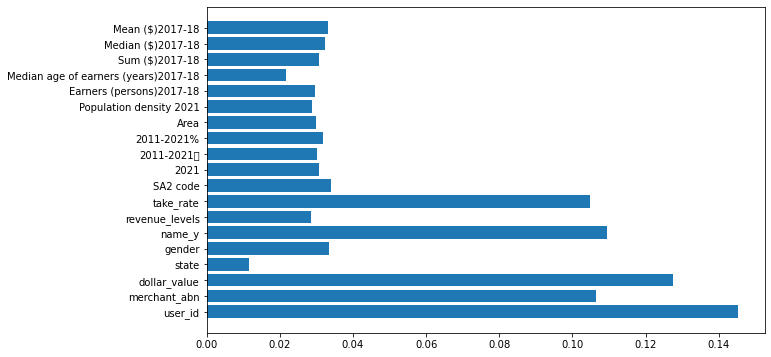

In [173]:
plt.figure(figsize=(10,6))
plt.barh(col_name,model.feature_importances_)

## Logistics Regression

In [219]:
drop_col = ['fraud_probability','order_datetime','postcode','tags','consumer_id','user_id','merchant_abn','SA2 code','name_y']

In [220]:
categ = ['state','gender','revenue_levels']
for i in categ:
    get_dummies = pd.get_dummies(dataset[i], prefix=i)
    dataset = pd.concat([dataset, get_dummies], axis=1, sort=False)
    dataset = dataset.drop([i],axis = 1)
# print(training_set.columns)

In [221]:
training_set = dataset.iloc[:int(len(dataset)*0.7),:].drop(drop_col,axis = 1)
testing_set = dataset.iloc[int(len(dataset)*0.7):,:].drop(drop_col,axis = 1)

In [222]:
train_labels = training_set.pop('isfraud')

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(training_set.values, train_labels)

LogisticRegression()

In [226]:
test_labels = testing_set.pop('isfraud')
y_pred=logreg.predict(testing_set)

In [227]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, y_pred))

[[10988     6]
 [  178     0]]


In [228]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.983530254206946


In [233]:
print(logreg.coef_)

[[-1.43336380e-07 -8.02027831e-09 -1.14146242e-05 -1.30284350e-06
  -1.41913124e-07  1.64504719e-06  1.21852461e-06 -4.56999070e-06
  -8.11123958e-08  2.35276879e-09 -4.61727659e-05 -4.74320013e-05
  -2.59924802e-11 -2.01732548e-10  8.18144212e-11 -2.23126369e-10
  -2.63184069e-10 -2.09672056e-10 -6.40069556e-10 -1.14956782e-10
  -6.11173373e-10 -7.72208737e-10 -2.13537328e-10 -8.72078887e-10
  -3.90413023e-10 -4.42361481e-10  2.80435010e-11  7.98904520e-11]]


In [234]:
col_name = list(testing_set.columns)
col_name[col_name.index(2021)] = str(col_name[col_name.index(2021)])

<BarContainer object of 28 artists>

/Users/bytedance/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bytedance/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


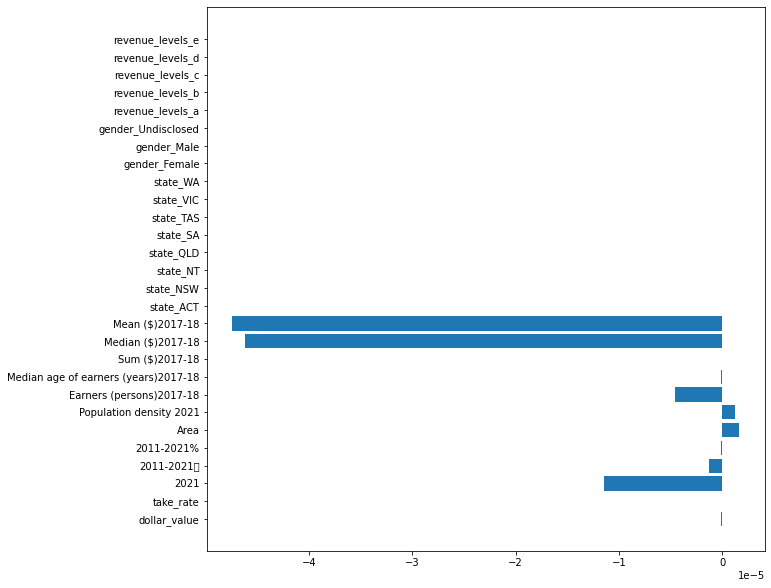

In [246]:
plt.figure(figsize=(10,10))
plt.barh(col_name,logreg.coef_.reshape(28))